#### test read in redshift info

In [2]:
from astropy.table import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

In [3]:
dev_path = '/Users/lejay/research/lephare_dev/my_code/'
output_dir = dev_path+'output_cats/'
graham_output_dir = dev_path + 'graham_output_cats/'

In [33]:
cat = Table.read('/Volumes/LejaySSD/DEEP_deep_CLAUDS_v9_CH1_CH2_corr.fits')
print(len(cat[cat['ZPHOT_G']>0]),len(cat),len(cat[cat['ZPHOT_G']>0])/len(cat))
select_ids = np.random.choice(np.arange(len(cat)), size=100)
cat_select = cat[select_ids]

2652778 3439649 0.7712350882313864


In [30]:
flag_irac_list = []
for gal in cat_select:
    zphot_v = gal['ZPHOT']
    cond_ch1 = ((gal['MAG_AUTO_CH1'] > 0.) & (gal['MAG_AUTO_CH1'] < 50.) & (
            gal['MAGERR_AUTO_CH1'] > 0.) & (gal['MAGERR_AUTO_CH1'] < 0.5))
    cond_ch2 = ((gal['MAG_AUTO_CH2'] > 0.) & (gal['MAG_AUTO_CH2'] < 50.) & (
            gal['MAGERR_AUTO_CH2'] > 0.) & (gal['MAGERR_AUTO_CH2'] < 0.5))
    flag_irac = int(cond_ch1) + int(cond_ch2)
    flag_irac_list.append(flag_irac)

#### trim down output catalogs
keep the full catalogs on Graham

In [11]:
prefix = 'pcat_' # '','v9pcat'
for cat_name in ['COSMOS_deep','DEEP_deep','ELAIS_deep']:
    print(graham_output_dir+prefix+cat_name+'_cat_out_nomaglimit_nonir_il_nz_prior_formass.fits')
    output_cat = Table.read(graham_output_dir+prefix+cat_name+'_cat_out_nomaglimit_nonir_il_nz_prior_formass.fits')
    
    keys_set1 = [key for key in output_cat.keys() if 'APER' in key]
    keys_set2 = [key for key in output_cat.keys() if 'inside' in key]
    keys_set3 = [key for key in output_cat.keys() if 'NBAND_USED' in key]
    keys_set4 = [key for key in output_cat.keys() if 'CONTEXT' in key]
    keys_other = ['IDENT','EBV_BEST', 'STRING_INPUT','isOutsideMask','isStar']
    if cat_name == 'COSMOS_deep':
        keys_other.append('HSC_i_MAGERR_AUTO')
    else:
        keys_other.append('FLAG_FIELD')
        keys_other.append('FLAG_FIELD_BINARY')
    keys = keys_set1 + keys_set2 + keys_set3 + keys_set4 + keys_other

    try:
        output_cat.remove_columns(keys)
    except KeyError:
        print('already done')
        
    print(len(output_cat.keys()))
    output_cat.write(graham_output_dir+prefix+cat_name+'_cat_out_nomaglimit_nonir_il_nz_prior_formass.fits', overwrite=True)

/Users/lejay/research/lephare_dev/my_code/graham_output_cats/pcat_COSMOS_deep_cat_out_nomaglimit_nonir_il_nz_prior_formass.fits
71
/Users/lejay/research/lephare_dev/my_code/graham_output_cats/pcat_DEEP_deep_cat_out_nomaglimit_nonir_il_nz_prior_formass.fits
already done
58
/Users/lejay/research/lephare_dev/my_code/graham_output_cats/pcat_ELAIS_deep_cat_out_nomaglimit_nonir_il_nz_prior_formass.fits
already done
57


In [ ]:
prefix = '' # '','v9pcat','pcat'
for cat_name in ['COSMOS_deep','DEEP_deep','ELAIS_deep']:
    output_cat = Table.read(graham_output_dir+prefix+cat_name+'_cat_out_nomaglimit_nonir_il_nz_prior_formass.fits')
    print(output_cat.keys())
    print(len(output_cat.keys()))
    
    keys_set1 = [key for key in output_cat.keys() if 'APER' in key]
    keys_set2 = [key for key in output_cat.keys() if 'inside' in key]
    keys_set3 = [key for key in output_cat.keys() if 'NBAND_USED' in key]
    keys_set4 = [key for key in output_cat.keys() if 'CONTEXT' in key]
    keys_other = ['IDENT','EBV_BEST', 'STRING_INPUT','MASK','OBJ_TYPE']
    if cat_name == 'COSMOS_deep':
        keys_other.append('HSC_i_MAGERR_AUTO')
    else:
        keys_other.append('FLAG_FIELD')
        keys_other.append('FLAG_FIELD_BINARY')
    keys = keys_set1 + keys_set2 + keys_set3 + keys_set4 + keys_other
    try:
        output_cat.remove_columns(keys)
    except KeyError:
        print('already done')
        
    print(len(output_cat.keys()))
    output_cat.write(graham_output_dir+prefix+cat_name+'_cat_out_nomaglimit_nonir_il_nz_prior_formass.fits', overwrite=True)

#### PDZ

In [3]:
# cat = Table.read('/Volumes/LejaySSD/COSMOS_ugrizy_PDZ_9813_LF.fits')
# cat['PDZ'] = cat['PDZ'].astype(np.float16)
# cat.write('/Volumes/LejaySSD/COSMOS_ugrizy_PDZ_9813_LF.fits',overwrite=True)

In [7]:
cat_massive = Table.read(graham_output_dir+'../COSMOS_deep_nonir_massive105z15.fits')
print(len(cat_massive))

22240


ID=4332501, M=10.9842
z_ML   z_V    z_G    z_G_6B
0.3933 0.2224 0.2149 0.2221


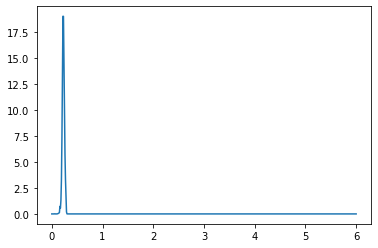

In [56]:
zbins = np.linspace(0,6,601)
gal = cat_massive[1553]
print('ID='+str(gal['ID'])+', M='+str(gal['MASS_MED_massrun']))
print('z_ML   z_V    z_G    z_G_6B')
print(gal['Z_ML'],gal['ZPHOT'],round(gal['ZPHOT_G'],4),round(gal['ZPHOT_6B_G'],4))
plt.plot(zbins,gal['PDZ'])

In [73]:
# double peaked?
double_peak = 0
wide_peak = 0
z_peaks = []

sp_list= [] # index of single peak pdz
dp_list = [] # index of double peak pdz
wp_list = [] # index of wide peak pdz
for idx,gal in enumerate(cat_massive):
    pdz = gal['PDZ']
    peak = np.max(pdz)
    z_peak = np.argmax(pdz)/100.0
    z_peaks.append(z_peak)
    
    arr = pdz>peak*0.4
    arr = arr.astype(int)
    arr_diff = np.diff(arr)
    
    if len(arr_diff[arr_diff==1])>1:
        dp_list.append(idx)
    if len(arr[arr==1])>50:
        wp_list.append(idx)
        
    if len(arr_diff[arr_diff==1])==1 and len(arr[arr==1])<=50:
        sp_list.append(idx)
z_peaks = np.array(z_peaks)    

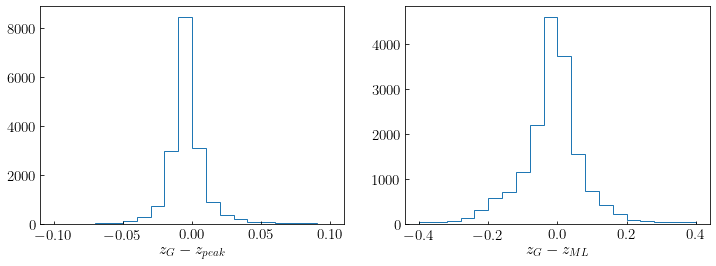

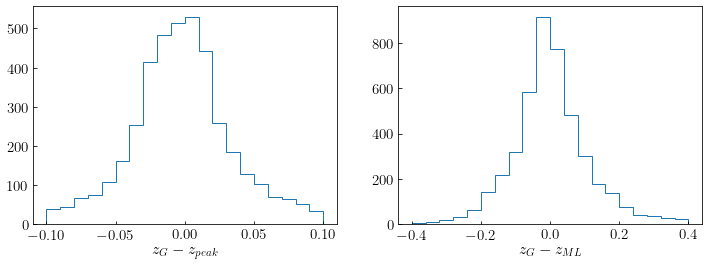

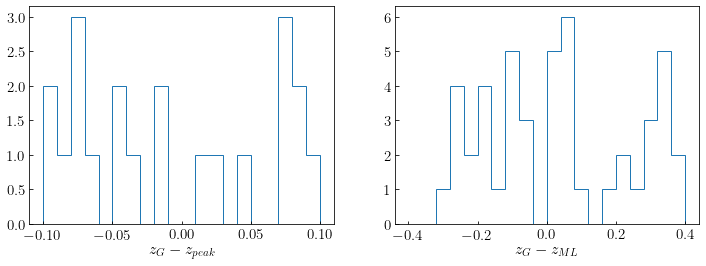

In [87]:
cat_massive_sp = cat_massive[sp_list]
fig, axs = plt.subplots(1, 2, figsize = (12, 4))
axs[0].hist(cat_massive_sp['ZPHOT_6B_G']-z_peaks[sp_list],range=(-0.1,0.1),bins=20,histtype='step')
axs[1].hist(cat_massive_sp['ZPHOT_6B_G']-cat_massive_sp['Z_ML'],range=(-0.4,0.4),bins=20,histtype='step')
axs[0].set_xlabel('$z_G-z_{peak}$',fontsize=16)
axs[1].set_xlabel('$z_G-z_{ML}$',fontsize=16)

cat_massive_dp = cat_massive[dp_list]
fig, axs = plt.subplots(1, 2, figsize = (12, 4))
axs[0].hist(cat_massive_dp['ZPHOT_6B_G']-z_peaks[dp_list],range=(-0.1,0.1),bins=20,histtype='step')
axs[1].hist(cat_massive_dp['ZPHOT_6B_G']-cat_massive_dp['Z_ML'],range=(-0.4,0.4),bins=20,histtype='step')
axs[0].set_xlabel('$z_G-z_{peak}$',fontsize=16)
axs[1].set_xlabel('$z_G-z_{ML}$',fontsize=16)

cat_massive_wp = cat_massive[wp_list]
fig, axs = plt.subplots(1, 2, figsize = (12, 4))
axs[0].hist(cat_massive_wp['ZPHOT_6B_G']-z_peaks[wp_list],range=(-0.1,0.1),bins=20,histtype='step')
axs[1].hist(cat_massive_wp['ZPHOT_6B_G']-cat_massive_wp['Z_ML'],range=(-0.4,0.4),bins=20,histtype='step')
axs[0].set_xlabel('$z_G-z_{peak}$',fontsize=16)
axs[1].set_xlabel('$z_G-z_{ML}$',fontsize=16)
plt.show()

#### compare

In [5]:
cat_name = 'COSMOS_deep'
cat_compare = Table.read(graham_output_dir+cat_name+'_nonir_v9_v9pcat_compare.fits')

(-2, 2)

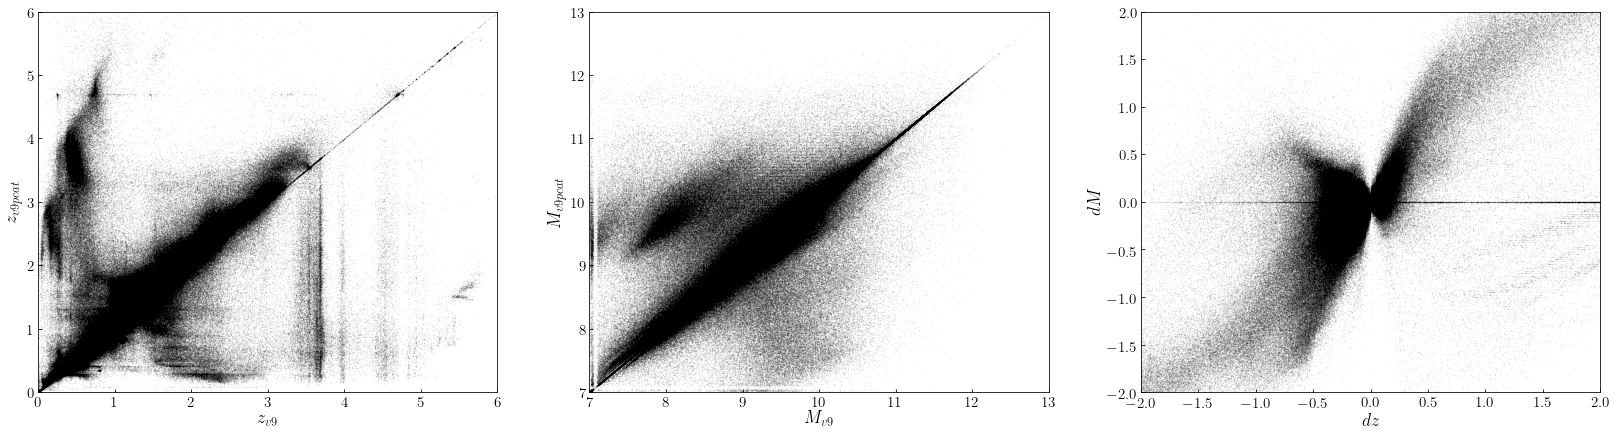

In [11]:
fig, axs = plt.subplots(1, 3, figsize = (28, 7))
axs[0].scatter(cat_compare['Z_ML'],cat_compare['Z_COM'],s=0.1,color='k',alpha=0.1)
axs[0].set_xlabel('$z_{v9}$',fontsize=18)
axs[0].set_ylabel('$z_{v9pcat}$',fontsize=18)
axs[0].set_xlim([0,6])
axs[0].set_ylim([0,6])

axs[1].scatter(cat_compare['MASS_MED_massrun_v9'],cat_compare['MASS_MED_massrun_v9pcat'],s=0.1,color='k',alpha=0.1)
axs[1].set_xlabel('$M_{v9}$',fontsize=18)
axs[1].set_ylabel('$M_{v9pcat}$',fontsize=18)
axs[1].set_xlim([7,13])
axs[1].set_ylim([7,13])

axs[2].scatter(cat_compare['Z_ML']-cat_compare['Z_COM'],cat_compare['MASS_MED_massrun_v9']-cat_compare['MASS_MED_massrun_v9pcat'],s=0.1,color='k',alpha=0.1)
axs[2].set_xlabel('$dz$',fontsize=18)
axs[2].set_ylabel('$dM$',fontsize=18)
axs[2].set_xlim([-2,2])
axs[2].set_ylim([-2,2])